In [6]:
%matplotlib inline
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy.stats import norm as norm_dist
from code.Utils import ESFitness

# Default variable definitions
num_samples = 100
available_files = [ 
    (2, 3), 
    (5, 1),  (5, 3),  (5, 6),  (5, 9),  (5, 10),            (5, 17),  (5, 20),  (5, 23),
    (10, 1), (10, 3), (10, 6), (10, 9), (10, 10), (10, 14), (10, 17), (10, 20), (10,23),
    (20, 1), (20, 3), (20, 6), (20, 9), (20, 10), (20, 14), (20, 17), (20, 20), (20,23),
]
folder_name = 'C:\\src\\master-thesis\\experiments\\num_runs_vs_std_dev'
data_file_name = 'raw_data\\GA_results_{ndim}dim_f{fid}.tdat'
save_file_name = 'processed_data\\samples_data_{ndim}dim_f{fid}.npz'
other_save_file_name = 'processed_data\\normalized_means_and_spread.npz'
distances_save_file = 'processed_data\\distances.npz'
plot_file_prefix = 'plots\\'

os.chdir(folder_name)

In [7]:
objects = {}

start = datetime.now()

# Create ESFitness objects from data files
for ndim, fid in available_files:
    if save_file_name.format(ndim=ndim, fid=fid)[15:] in os.listdir('processed_data'):
        print("{} already exists, skipping...".format(save_file_name.format(ndim=ndim, fid=fid)[15:]))
        continue
    with open(data_file_name.format(ndim=ndim, fid=fid), 'r') as f:
        lines = [line for line in f]
    objects[(ndim, fid)] = [eval(line) for line in lines]

    num_ESs = len(objects[(ndim, fid)])
    num_runs = len(objects[(ndim, fid)][0].min_fitnesses)
    
    means = np.zeros((num_runs, num_ESs, num_samples))
    medians = np.zeros((num_runs, num_ESs, num_samples))
    std_devs = np.zeros((num_runs, num_ESs, num_samples))
    
    for obj in objects[(ndim, fid)]:
        obj.min_fitnesses = np.array(obj.min_fitnesses)
    
    for sample_size in range(2, num_runs):
        samples = np.zeros((num_ESs, num_samples, sample_size))
        for sample_num in range(num_samples):
            sample_indices = np.random.choice(num_runs, sample_size, replace=False)
            for ES_num in range(num_ESs):
                obj = objects[(ndim, fid)][ES_num]
                samples[ES_num,sample_num,:] = obj.min_fitnesses[sample_indices]
    
        means[sample_size, :, :] = np.mean(samples, axis=2)
        medians[sample_size, :, :] = np.median(samples, axis=2)
        std_devs[sample_size, :, :] = np.std(samples, axis=2)

    save_file = save_file_name.format(ndim=ndim, fid=fid)
    np.savez(save_file, means=means, medians=medians, std_devs=std_devs)

stop = datetime.now()
print(stop-start)

samples_data_2dim_f3.npz already exists, skipping...
samples_data_5dim_f1.npz already exists, skipping...
samples_data_5dim_f3.npz already exists, skipping...
samples_data_5dim_f6.npz already exists, skipping...
samples_data_5dim_f9.npz already exists, skipping...
samples_data_5dim_f10.npz already exists, skipping...
samples_data_5dim_f17.npz already exists, skipping...


samples_data_10dim_f1.npz already exists, skipping...
samples_data_10dim_f3.npz already exists, skipping...
samples_data_10dim_f6.npz already exists, skipping...
samples_data_10dim_f9.npz already exists, skipping...
samples_data_10dim_f10.npz already exists, skipping...
samples_data_10dim_f14.npz already exists, skipping...
samples_data_10dim_f17.npz already exists, skipping...
samples_data_10dim_f20.npz already exists, skipping...
samples_data_10dim_f23.npz already exists, skipping...
samples_data_20dim_f1.npz already exists, skipping...
samples_data_20dim_f3.npz already exists, skipping...
samples_data_20dim_f6.npz already exists, skipping...
samples_data_20dim_f9.npz already exists, skipping...
samples_data_20dim_f10.npz already exists, skipping...
samples_data_20dim_f14.npz already exists, skipping...
samples_data_20dim_f17.npz already exists, skipping...
samples_data_20dim_f20.npz already exists, skipping...
samples_data_20dim_f23.npz already exists, skipping...
0:04:51.425000


In [5]:
for ndim, fid in available_files:
    
    with open(save_file_name.format(ndim=ndim, fid=fid), 'rb') as save_file:
        npzfile = np.load(save_file)
        means = npzfile['means']
        num_runs, num_ESs, num_samples = means.shape
    
        ESs_to_be_plotted = range(0, num_ESs, 15)
        plot_length = num_runs//4
            
        for ES in ESs_to_be_plotted:
            x_data = range(2, plot_length)
            y_data = np.mean(means[2:plot_length,ES,:], axis=1)
            y_error = np.std(means[2:plot_length,ES,:], axis=1)
            plot_file_name = "mean_std_dev_{}dim_f{}_ES{}_errorbar.png".format(ndim, fid, ES)
            
            plt.figure(figsize=(16,9))
            plt.errorbar(x=x_data, y=y_data, yerr=y_error, linestyle='None', marker='o')
            plt.title("Mean and Standard Deviation for ES {}/{} in {}dim F{}".format(ES, num_ESs, ndim, fid))
            plt.xlabel("Number of runs")
            plt.savefig(plot_file_prefix + plot_file_name)
            plt.close()

In [6]:
for ndim, fid in available_files:
    
    with open(save_file_name.format(ndim=ndim, fid=fid), 'rb') as save_file:
        npzfile = np.load(save_file)
        means = npzfile['means']
        num_runs, num_ESs, num_samples = means.shape
    
        ESs_to_be_plotted = range(0, num_ESs, 15)
        plot_length = num_runs//4
            
        for ES in ESs_to_be_plotted:
            x_data = range(2, plot_length)
            y_data = np.mean(means[2:plot_length,ES,:], axis=1)
            y_error = np.std(means[2:plot_length,ES,:], axis=1)
            data_mean = np.mean(y_data)
            y_data = y_data / data_mean
            y_error = y_error / data_mean
            
            plot_file_name = "mean_std_dev_{}dim_f{}_ES{}_errorbar_normalized.png".format(ndim, fid, ES)
            
            plt.figure(figsize=(16,9))
            plt.axhline(y=1, color='k')
            plt.errorbar(x=x_data, y=y_data, yerr=y_error, linestyle='None', marker='o')
            plt.title("Normalized Mean and Standard Deviation for ES {}/{} in {}dim F{}".format(ES, num_ESs, ndim, fid))
            plt.xlabel("Number of runs")
            plt.savefig(plot_file_prefix + plot_file_name)
            plt.close()

In [11]:
all_data = []
all_errors = []
total_ESs = 0

for ndim, fid in available_files:
    
    with open(save_file_name.format(ndim=ndim, fid=fid), 'rb') as save_file:
        npzfile = np.load(save_file)
        means = npzfile['means']
        num_runs, num_ESs, num_samples = means.shape
        plot_length = num_runs
        total_ESs += num_ESs
            
        for ES in range(num_ESs):
            y_data = np.mean(means[2:plot_length,ES,:], axis=1)
            y_error = np.std(means[2:plot_length,ES,:], axis=1)
            data_mean = np.mean(y_data)
            y_data = y_data / data_mean
            y_error = y_error / data_mean
            
            all_data.append(y_data)
            all_errors.append(y_error)

all_data = np.mean(np.array(all_data), axis=0)
all_errors = np.mean(np.array(all_errors), axis=0)
x_data = range(2, plot_length)
np.savez(other_save_file_name, means=all_data, std_devs=all_errors, x_range=x_data)

plot_file_name = "mean_std_dev_errorbar_normalized_aggregated.png"

plt.figure(figsize=(16,9))
plt.axhline(y=1, color='k')
for i in range(1,16):
    plt.axhline(y=1+i*0.1, color='r')
plt.errorbar(x=x_data, y=all_data, yerr=all_errors, linestyle='None', marker='o')
plt.title("Normalized Mean and Standard Deviation, Aggregated over {} different ESs".format(total_ESs))
plt.xlabel("Number of runs")
plt.savefig(plot_file_prefix + plot_file_name)
plt.close()

271995
[0.0, 0.020616227584378335, 0.058400466969259678, 0.10634559412965063, 0.1662060070020269, 0.24024283175267741, 0.33333333445004937, 0.46030851898336572, 0.66666041938551823, 0.99999788730466166, 1.4999974757971348, 2.5821976940297873, 5.0786734833446454, 12.354716163164984, 61.769817077423795, 1120.2499946449345, 47910.091655805649, 4783398.9385105129, 274104129.7351374, 7985936829.9806166, 50015405329951.664]


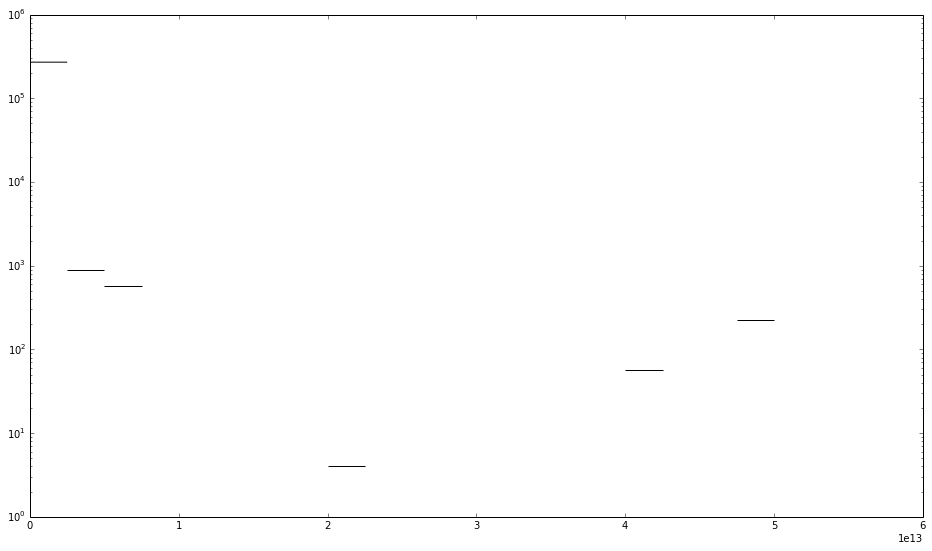

In [12]:
all_distances = []

for ndim, fid in available_files:
    with open(data_file_name.format(ndim=ndim, fid=fid), 'r') as f:
        lines = [line for line in f]
    objects = [eval(line) for line in lines]
    FCEs = [obj.FCE for obj in objects]
    ERTs = [obj.ERT for obj in objects]
    
    num_ESs = len(FCEs)
    distances = []
    for ES in range(num_ESs-1):
        for other_ES in range(ES+1, num_ESs):
            this = FCEs[ES]
            other = FCEs[other_ES]
            dist = np.abs(this - other)
            if dist != 0:
                distances.append(dist / min(this, other))
            else:
                this = ERTs[ES]
                other = ERTs[other_ES]
                if this is None or other is None:
                    distances.append(0)  # Apparently, distance here is actually 0... :/
                else:
                    distances.append(np.abs(this - other) / min(this, other))
    
    all_distances.extend(distances)

all_distances.sort()
np.savez(distances_save_file, distances=all_distances)
print(len(all_distances))
print(all_distances[::len(all_distances)//20])

plt.figure(figsize=(16,9))
plt.hist(all_distances, bins=20)
plt.yscale('log')

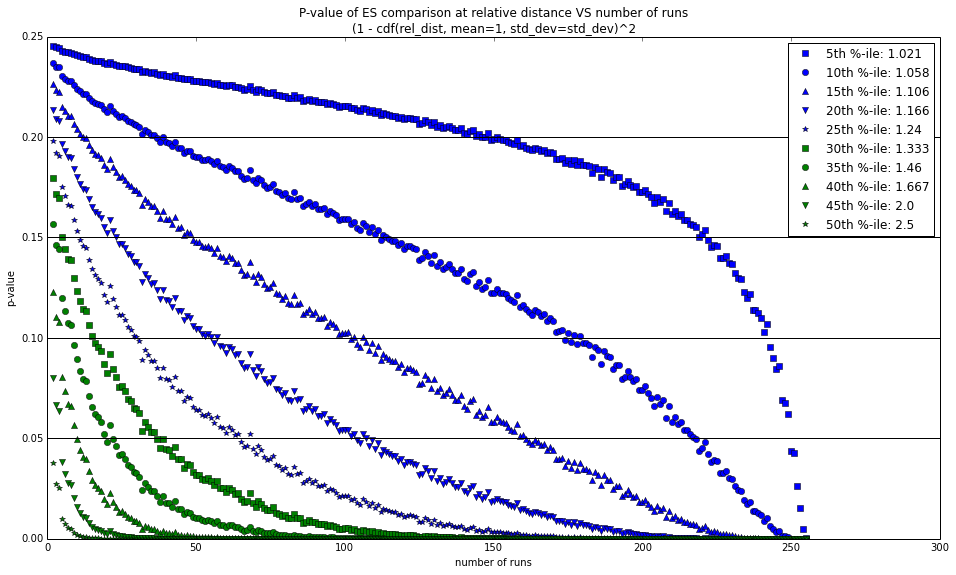

In [13]:
distances = np.load(distances_save_file)['distances']
means = np.load(other_save_file_name)['means']
std_devs = np.load(other_save_file_name)['std_devs']
x_range = np.load(other_save_file_name)['x_range']
five_percent_points = distances[len(distances)//20::len(distances)//20]

probabilities = {}
for i in range(20):
    probabilities[i] = []
    for j, std_dev in enumerate(std_devs):
        # mean = means[j]  # Using actual mean value creates a messy plot
        mean = 1
        probability = (1-norm_dist.cdf(1 + five_percent_points[i], loc=mean, scale=std_dev)) ** 2
        probabilities[i].append(probability)

markers = ['bs', 'bo', 'b^', 'bv', 'b*', 
           'gs', 'go', 'g^', 'gv', 'g*', 
           'rs', 'ro', 'r^', 'rv', 'r*', 
           'ys', 'yo', 'y^', 'yv', 'y*', ]

plt.figure(figsize=(16, 9))
plt.title('P-value of ES comparison at relative distance VS number of runs\n'
          '(1 - cdf(rel_dist, mean=1, std_dev=std_dev)^2')
plt.xlabel('number of runs')
plt.ylabel('p-value')

for i in range(10):
    p = (i+1) * 5
    dist = five_percent_points[i]
    plt.plot(x_range, probabilities[i], markers[i], label='{}th %-ile: {:.4}'.format(p, 1+dist))

for i in range(1,5):
    plt.axhline(y=i*0.05, color='k')
    
plt.legend(numpoints=1)

plot_file_name = 'certainty_at_distance_vs_num_runs.png'
plt.savefig(plot_file_prefix + plot_file_name)